<img src="./img/HWNI_logo.svg"/>

# Lab - Hypothesis Testing

In [1]:
# makes our plots show up inside Jupyter
%matplotlib notebook

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)

import util.lab03utils as utils 

# this makes our tables easier to read
utils.formatDataframes()

/Users/charlesfrye/anaconda/envs/neur299/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/charlesfrye/anaconda/envs/neur299/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In this lab, we use simulated experiments to investigate the ideas covered in the
[tutorial on Hypothesis Testing](./Tutorial\ -\ Hypothesis\ Testing.ipynb).

The experiment we simulate is inspired by a 
[classic neuroscience experiment](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1514868/)
performed by Adrian in the 1920s.

At the time, very little of what we now take for granted was known about the behavior of neurons. This early experiment demonstrated that the nerves exiting the cat's foot produced more action potentials when a weight was pressed onto the foot in a manner that depended on the weight.

<img src="./img/adrian_yngve_1926_apparatus.gif">

We'll model this experiment using the random number generators provided with NumPy. The function `runExperiment` below will produce a random spike count using the
[Poisson](https://en.wikipedia.org/wiki/Poisson_distribution)
distribution, which has been used to
[model neural spiking in response to stimuli](https://en.wikipedia.org/wiki/Linear-nonlinear-Poisson_cascade_model),
then compare it to the argument `critical_value`.
The result of the test is returned as number:
`0` if the alternative hypothesis is not accepted
and `1` if the alternative hypothesis is accepted.
If the random spike count is higher than the critical value,
the alternative hypothesis is accepted,
otherwise it is not accepted.

The average value of the random spike count is determined by a parameter.
This parameter is set by two of the arguments to `runExperiment`: `baserate`, which we can think of as setting the average number of spikes when the foot is not being stimulated, and `difference`, which corresponds to the change in this average when the foot is stimulated.

This is a very simple experiment and a very simple statistical test, but it will still allow us to see the major features of hypothesis testing discussed in the tutorial:
true positive rates, false positive rates, and false discovery rates.

In [2]:
def runExperiment(baserate,difference,critical_value):
    """ run a single experiment where the number of spikes recorded from a 
        neuron firing with rate baserate+difference
        is compared to the critical_value.
        
        returns a 1 if the (randomly-generated) number of spikes
        is higher than the cutoff, otherwise returns a 0
        
        the number of spikes comes from a poisson distribution
    """
    stimulated_spikes = np.random.poisson(lam=baserate+difference)
    
    if stimulated_spikes > critical_value:
        accepted = 1
    else:
        accepted = 0
    
    return accepted

In [3]:
def simulateExperiments(numExperiments,rate,effect_size,critical_value):
    """ simulate numExperiments experiments with runExperiment
        and return the result as a list.
        
        this list has 1s where the null hypothesis was rejected
        and 0s where the null hypothesis was not rejected
    """
    results = np.zeros(numExperiments)
    
    for experimentIdx in range(numExperiments):
        result = runExperiment(rate,effect_size,critical_value)
        results[experimentIdx] = result
    
    return results

## True and False Positive Rates

To start, we'll estimate the true and false positive rates.

#### Q1 In your own words, what are true and false positive rates?

### False Positive Rate

We can estimate the false positive rate by simulating the results of our hypothesis test when the effect size, the difference in average spike counts between stimulated and unstimulated nerves, is 0.

#### Q2 What is the connection between the effect size being 0 and the false positive rate?

The results of the experiments are stored in a list called `nulltrue_results`. Use this list to calculate the fraction of times that we got a (false) positive result. You could use a `for` loop or the `sum` function or the `np.mean` function.

In [4]:
rate = 10
effect_size = 0

critical_value = 15
numExperiments = 1000

nulltrue_results = simulateExperiments(numExperiments, rate, effect_size,
                                       critical_value)


In [5]:
np.mean(nulltrue_results)

0.048000000000000001

The false positive rate depends critically (ha!) on the critical value of our test. Remember that the critical value is the value of the test statistic (for us, this is just the observed spike count) above which you reject the null hypothesis.

#### Q3 Make a prediction: will increasing the critical value increase or decrease the false positive rate?

Test your prediction in the cell below.

In [6]:
rate = 10
effect_size = 0

critical_value = 20
numExperiments = 1000

nulltrue_results = simulateExperiments(numExperiments, rate, effect_size,
                                       critical_value)


As can be seen above, changing the critical value changes the false positive rate. The two code cells below will allow us to examine this dependence in detail.

#### Q4 Make a prediction: what will the false positive rate be when the critical value is 0? what about when the critical value is very large?

In [7]:
false_positive_rates = []

rate = 10
effect_size = 0
numExperiments = 10000

critical_values = range(0,21)

for critical_value in critical_values:
    false_results = simulateExperiments(numExperiments, rate, 0,
                                       critical_value)
    
    false_positive_rates.append(np.mean(false_results))

<IPython.core.display.Javascript object>


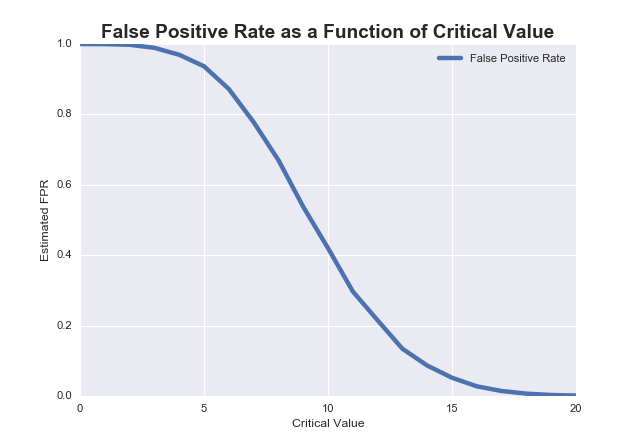

In [9]:
plt.figure()
plt.plot(critical_values,false_positive_rates,
         linewidth=4,
         label='False Positive Rate');
plt.title("False Positive Rate as a Function of Critical Value",
         fontsize='x-large',
          fontweight='bold');
plt.xlabel('Critical Value'); plt.ylabel("Estimated FPR")
plt.legend();

## True Positive Rate

We can estimate the true positive rate by simulating the results of our hypothesis test when the effect size is non-zero.

The cell below will produce a list, `nullfalse_results`

In [10]:
rate = 10
effect_size = 1

critical_value = 15
numExperiments = 1000

nullfalse_results = simulateExperiments(numExperiments, rate, effect_size,
                                       critical_value)

In [11]:
np.mean(nullfalse_results)

0.088999999999999996

The true positive rate depends, just like the false positive rate, on the critical value.

#### Q4 Make a prediction: will increasing the critical value increase or decrease the true positive rate?

Test your prediction in the cell below.

In [12]:
rate = 10
effect_size = 1

critical_value = 20
numExperiments = 1000

nullfalse_results = simulateExperiments(numExperiments, rate, effect_size,
                                       critical_value)

In [13]:
np.mean(nullfalse_results)

0.0040000000000000001

As above, we can simulate the results for a variety of critical values

In [21]:
true_positive_rates = []

rate = 10
effect_size = 1
numExperiments = 10000

critical_values = range(0,21)

for critical_value in critical_values:
    false_results = simulateExperiments(numExperiments, rate, effect_size,
                                       critical_value)
    
    true_positive_rates.append(np.mean(false_results))

<IPython.core.display.Javascript object>


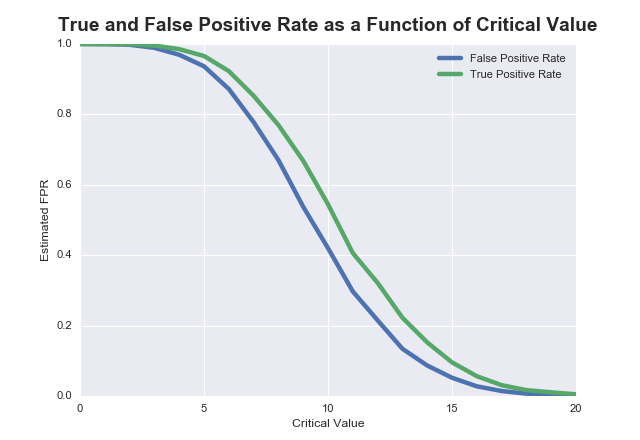

In [22]:
plt.figure()
plt.plot(critical_values,false_positive_rates,
         linewidth=4,
         label='False Positive Rate');
plt.plot(critical_values,true_positive_rates,
         linewidth=4,
         label='True Positive Rate');
plt.title("True and False Positive Rate as a Function of Critical Value",
         fontsize='x-large',
          fontweight='bold',
         y=1.02);
plt.xlabel('Critical Value'); plt.ylabel("Estimated FPR")
plt.legend();

#### Q5 Based on this chart, what would you select as your critical value? Explain your reasoning.

### TPR as a Function of Critical Value and Effect Size

The true positive rate also depends on the actual size of the effect you're looking for. The code cells below will produce an interactive 3-d plot of the true positive rate as a function of both the effect size and the critical value. Left-clicking and dragging allows you to rotate the plot, while right-clicking and dragging allows you to zoom.

In [23]:
def create_TPR_matrix(baserate,effect_sizes,critical_values,numExperiments=10000):
    
    num_effect_sizes = len(effect_sizes)
    num_critical_values = len(critical_values)
    
    TPR_mat = np.zeros((num_effect_sizes,num_critical_values))
    
    for rowIdx,effect_size in enumerate(effect_sizes):
        for colIdx,critical_value in enumerate(critical_values):
            TPR_mat[rowIdx,colIdx] = np.mean(simulateExperiments(numExperiments,
                                                         baserate, effect_size,
                                                           critical_value))
    
    return TPR_mat

In [24]:
baserate = 10

numExperiments = 10000

critical_values = list(range(5,21))
effect_sizes = list(range(1,16))

TPR = create_TPR_matrix(baserate,effect_sizes,critical_values,numExperiments=numExperiments)

<IPython.core.display.Javascript object>


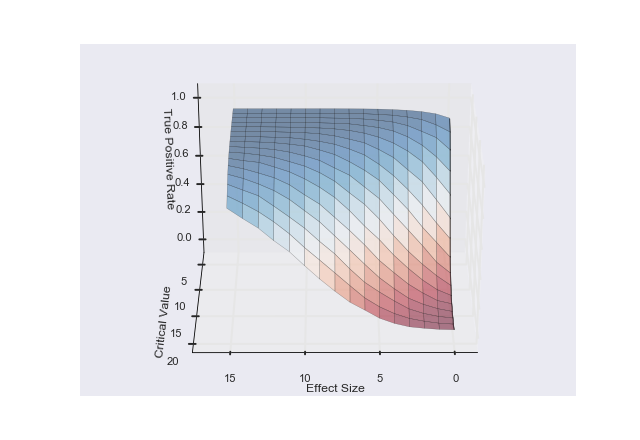

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

critical_value_mesh, effect_size_mesh = np.meshgrid(critical_values,effect_sizes)

ax.plot_surface(effect_size_mesh,critical_value_mesh,TPR,
                rstride=1,cstride=1,
               cmap='RdBu',alpha=0.5);
ax.set_xlabel('Effect Size'); ax.set_ylabel('Critical Value'); ax.set_zlabel('True Positive Rate');

#### Q6 Explain the shape of this graph: why does the rate go down when you decrease the effect size and hold the critical value constant? why are the extreme values -- closest to 1 (blue) and closest to 0 (red) -- located where they are?

#### Q7 Why can't we calculate a true positive rate for the case where `effect_size == 0`?

## $p$-Value

If we have a good model of our null hypothesis, then we do more than just say whether we reject or fail to reject the null. If we can determine the probability that, if the null hypothesis were true, we'd observe what we observed, then we can express the degree to which our results support the null hypothesis. This probability is called the $p$-value.

In many familiar statistical tests, this model is *parametric* -- we assume some form for the distribution of the data and the test statistic under the null hypothesis and then, possibly after measuring some data generated according to the null hypothesis and inferring those parameters, we use the mathematical form of that distribution to calculate the $p$-value.

When we don't know what form to assume the null distribution has, we can use a *nonparametric* method instead. In a non-parametric method, we instead use the data measurements to directly estimate the shape of the null distribution of the test statistic. Since our test statistic is just the number of spikes that we measure in a single experiment, that means we just need to collect a large number of spike counts distributed according to the null hypothesis.

So in our case, we estimate the $p$-value by repeatedly measuring the spike counts from a neuron in an unstimulated cat's foot and then calculating how often that spike count is higher than the spike count from the neuron when the foot is stimulated.

The cell below will simulate measuring the spike counts from an unstimulated foot `number_null_measurements` times, along with a single measurement of the spike count from a stimulated foot.

It then plots a histogram of the spike counts from the unstimulated foot along with a single tick mark indicating the number of spikes measured from the stimulated foot. The bins are selected so that each bin contains a single value of the spike count.

<IPython.core.display.Javascript object>


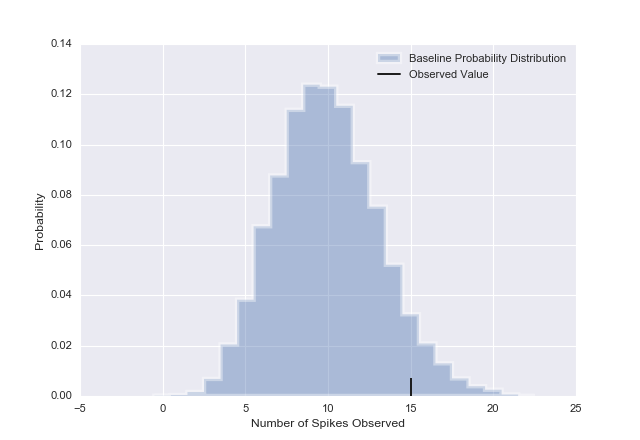

In [128]:
number_null_measurements = 10000

difference = 5
baserate = 10

baseline_spikes = np.random.poisson(lam=baserate,size=10000)
stimulated_spikes = np.random.poisson(lam=baserate+difference)

xMax = max(max(baseline_spikes),stimulated_spikes)
bins = np.arange(-.5,xMax,1)

plt.figure()
sns.distplot(baseline_spikes,
             bins=bins,
             kde=False,hist=True,
             hist_kws={'normed':True,
                       'linewidth':4,
                       'edgecolor':'w',
                       'histtype':'stepfilled'},
             label='Baseline Probability Distribution'
            );

plt.vlines(stimulated_spikes,
           ymin=0,
           ymax=plt.gca().get_ylim()[1]/20,
          label='Observed Value');
plt.xlabel("Number of Spikes Observed")
plt.ylabel("Probability");
plt.legend();

#### Q8 What is the relationship between this histogram and the null distribution of our test statistic?

A rough guess for the $p$-value can be read directly off the chart above.

#### Q9 Explain how you'd do this.

To calculate the $p$-value precisely, we need the actual heights for this histogram.

#### Q10 How would we calculate the $p$-value from this information?

The cell below uses the function `np.histogram` to collect these values and store them in the list `probabilities`. This list acts like a probability mass function: accessing the `i`th element of the list with `probabilities[i]` tells you the fraction of experiments in which `i` spikes occurred.

In [125]:
probabilities, _ = np.histogram(baseline_spikes,bins=bins,normed=True)

#### Q11 Calculate the $p$-value in the cell below.

In [129]:
1-np.sum(probabilities[:stimulated_spikes])

0.080099999999999838

Simulate a different outcome for the experiment by running the cell below to collect a different random value for `stimulated_spikes`.

In [ ]:
stimulated_spikes = np.random.poisson(lam=baserate+difference)

#### Q12 Re-calculate the $p$-value. Is it the same or different? Why is this?

In addition to the probability distribution, the *cumulative distribution function* can be used to represent the chance that a random variable, like a test statistic, takes on some value. The cumulative distribution function, also known as the CDF, takes in a value and returns the probability that the random variable is *less than or equal to* that value. Put another way, it tells you how much probability has *accumulated* as the value of the random variable increases from some minimum up to the current value.

The cell below calculates and plots the cumulative distribution function for the null distribution of our test statistic.

#### Q13 How might this information be used to calculate the $p$-value?

In [132]:
probabilties = probabilities[:]
CDF = np.cumsum(probabilities)
CDF = np.hstack([CDF,np.ones(10)])

<IPython.core.display.Javascript object>


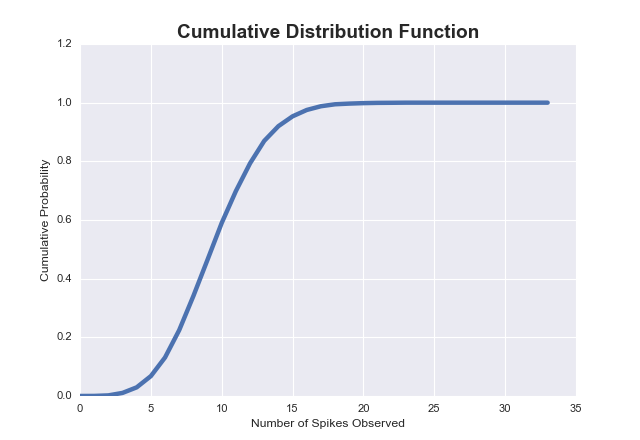

In [133]:
plt.figure()
plt.plot(CDF,linewidth=4);
plt.xlabel("Number of Spikes Observed")
plt.ylabel("Cumulative Probability");
plt.title("Cumulative Distribution Function",
         fontsize='x-large',
          fontweight='bold');

Recall that the $p$-value is the probability, under the null hypothesis, that the test statistic takes on a value that is at least as extreme as the measured value.

#### Q14 Based on this, can you determine the chance, when the null hypothesis is true, that the $p$-value is less than 0.5? 0.05? 0?

Thanks to our simulation framework, we can answer this question directly. The cell below will compute the $p$-value for a large number of experiments and then present the histogram of the results.

In [174]:
baserate=1000
baseline_spikes = np.random.poisson(lam=baserate,size=100000)

probabilities, edges = np.histogram(baseline_spikes,bins=1000,normed=True)


CDF = lambda x: np.cumsum(probabilities*(edges[1]-edges[0]))[np.argmax(edges>=x)]

In [178]:
numExperiments = 10000
effect_size = 10

ps = [1- CDF(simulated_spikes) for simulated_spikes 
                        in np.random.poisson(lam=baserate+effect_size,size=numExperiments)]

In [179]:
p_probabilities, _ = np.histogram(ps,bins=5,normed=True)

<IPython.core.display.Javascript object>


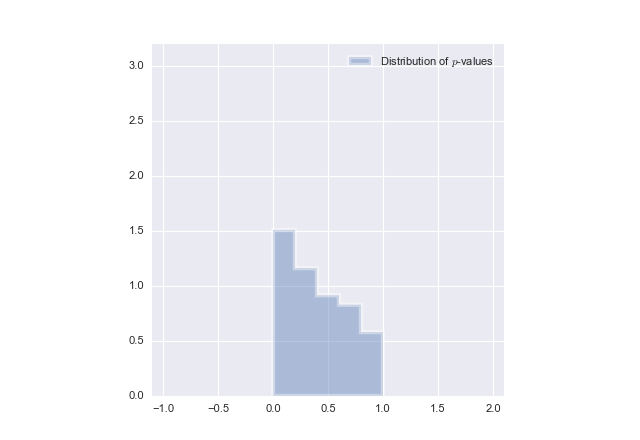

In [180]:
plt.figure()
sns.distplot(ps,
             bins=5,
             kde=False,hist=True,
             hist_kws={'normed':True,
                       'linewidth':4,
                       'edgecolor':'w',
                       'histtype':'stepfilled'},
             label=r'Distribution of $p$-values'
            );

_, yMax = plt.gca().get_ylim()
plt.gca().set_ylim([0,yMax*2]);
yMin, yMax = plt.gca().get_ylim()
deltaY = yMax-yMin
plt.gca().set_xlim([0.5-deltaY/2,0.5+deltaY/2])
plt.gca().set_aspect('equal'); plt.legend();

#### Q15 What shape does this distribution have?

Run the code cell above with the `effect_size` set to `10`.

#### Q16 Now what shape does the distribution have?

This information about the shape of the distribution of $p$-values can be used to calculate false discovery rates, but only if we run a variety of very similar experiments. For more, see this
[Points of Significance article](http://www.nature.com/nmeth/journal/v11/n4/full/nmeth.2900.html).